In [1]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import sys
sys.path.append('.')

from utils import *
from experiment import *
from dataloader.vlfc import COMPANIES
from visualize import *

# Quick start with a single experiment

We start with runing a single time series forecasting experiment. We will run return forecasting problem on AMD stock return with baseline adapative conformal inference (ACI) methods.

### Load the hyper parameters of the model

The first step is to load the config file in `bellman-conformal-inference/config`.

In [3]:
params = read_yaml('config/rtfc-aci-AMD.yaml')

The naming of the config file follows the convention of `TASK_NAME-METHOD_NAME-TASK_DATASET.yaml`. In this case, the config file looks like

```
> params

{'task': 'rtfc',        # the return forecasting problem, avalibale choices ['rtfc', 'vlfc']
 'method': 'aci',       # the adapative conformal algorithm to use. 'aci' means baseline Adapative Conformal Algorithm
 'id': 'AMD',           # the dataset to be used by the experiment. They can be found in 'data/'
 'alpha0': 0.1,         # target miscoverage rate. In this case 10%
 'gamma': 0.1,          # step size for either ACI or BCI
 'lambda_init': 0.9,
 'lambda_max': 1.0,
 'lambda_min': 0.0}
```

### Build the experiment object and run the experiment

The experiment object created by

In [5]:
exp = ForecastingExperiment(params)

We can run the experiment by using the `.run()` method, which captures all the details of computing $\alpha_t$ for each $t$. To hack around the code, please see `experiment.py` for the logic of computing $\alpha_t$.

In [6]:
exp.run()

2024-02-07 11:44:23,714 - INFO - Experiment rtfc-aci-AMD-gamma_0.1-lambda0_0.9 STARTED
2024-02-07 11:44:29,527 - INFO - Experiment rtfc-aci-AMD-gamma_0.1-lambda0_0.9 ENDED in 5.813563108444214s


After we run the experiment, we can optionally save the experiment. They will be saved in `bellman-conformal-inference/result/*`. This include the full trajectory of the experiment, and the hyper parameter used.

In [7]:
exp.save()

Finally, we can visualize the experiment by calling the `visualize_single_exp(**)` function defined in `bellman-conformal-inference/visualize.py`.

In [5]:
visualize_single_exp(exp.params, exp.result)

# Comparsion of three experiments

Next we demonstrate how to compare performance across three methods -- ACI, BCI, fixed $\alpha_t$ for the same experiment.

In [8]:
exp_aci = ForecastingExperiment(read_yaml('config/rtfc-aci-AMD.yaml'))
exp_aci.run()

exp_bci = ForecastingExperiment(read_yaml('config/rtfc-bci-AMD.yaml'))
exp_bci.run()

exp_fixed = ForecastingExperiment(read_yaml('config/rtfc-fixed-AMD.yaml'))
exp_fixed.run()

2024-02-07 11:55:23,857 - INFO - Experiment rtfc-aci-AMD-gamma_0.1-lambda0_0.9 STARTED
2024-02-07 11:55:29,670 - INFO - Experiment rtfc-aci-AMD-gamma_0.1-lambda0_0.9 ENDED in 5.812071800231934s
2024-02-07 11:55:29,694 - INFO - Experiment rtfc-bci-AMD-gamma_0.8-lambda0_5.0 STARTED
2024-02-07 11:55:51,014 - INFO - Experiment rtfc-bci-AMD-gamma_0.8-lambda0_5.0 ENDED in 21.320128679275513s
2024-02-07 11:55:51,039 - INFO - Experiment rtfc-fixed-AMD-gamma_NA-lambda0_NA STARTED
2024-02-07 11:55:59,769 - INFO - Experiment rtfc-fixed-AMD-gamma_NA-lambda0_NA ENDED in 8.730332851409912s


As before, we can visualize the comparsion as `visualize_three_exp`. In contrast to the previous plot, the figure first panel is the moving average mis-coverage rate, and the bottom panel is the moving average of interval length. The performance metric is given in the title of the plot:

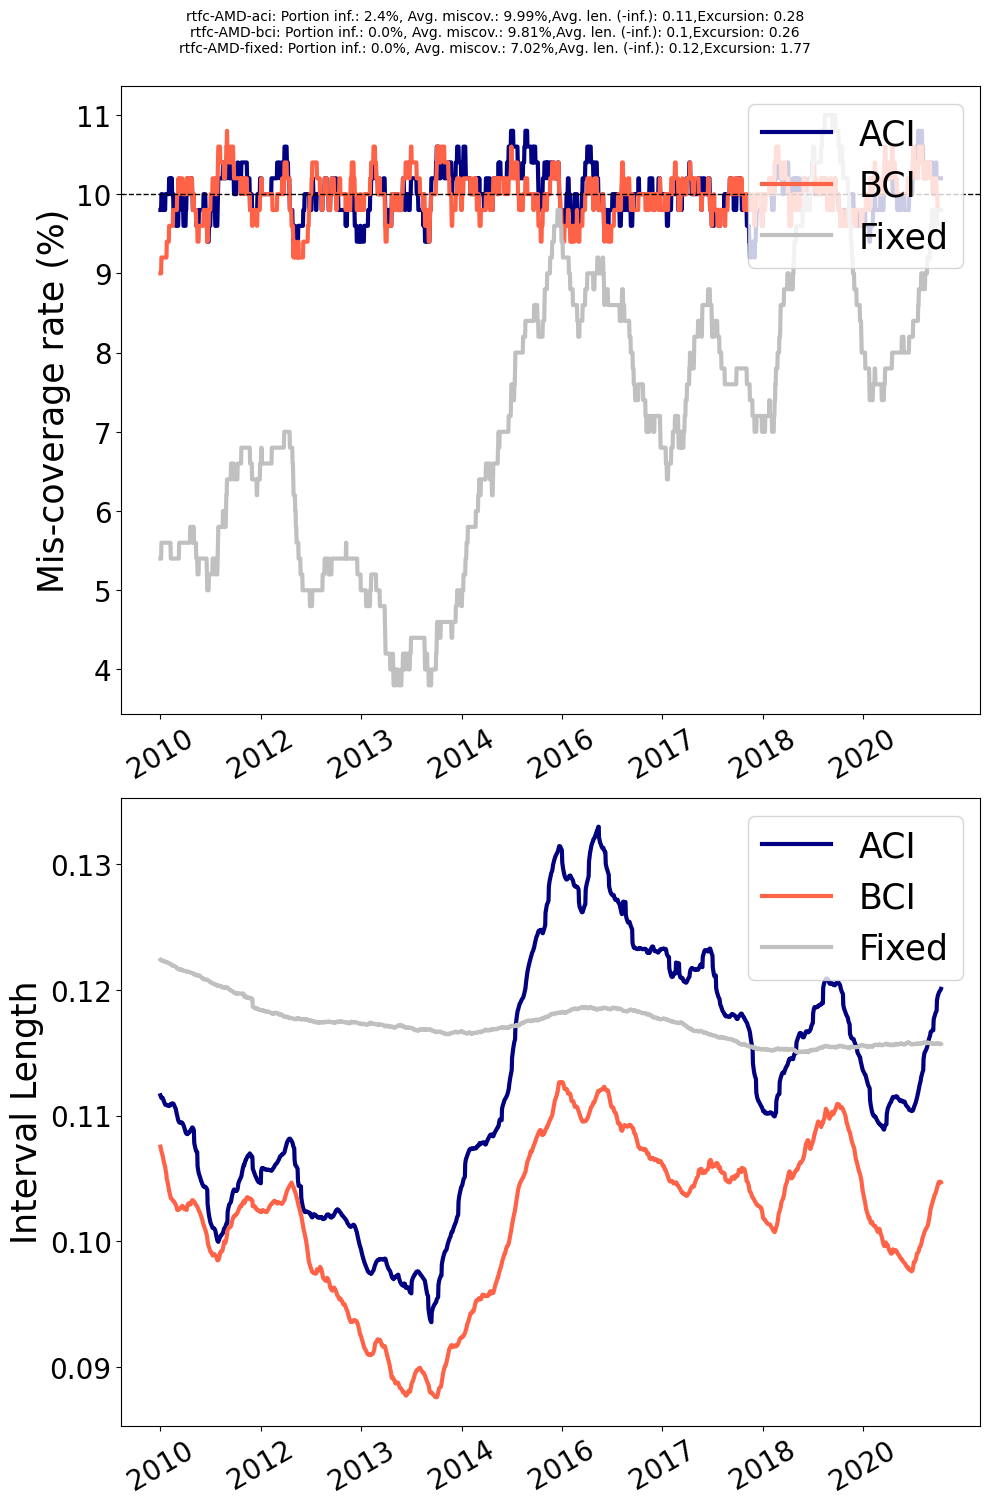

In [9]:
visualize_three_exp(exp_aci.params, exp_aci.result,
                    exp_bci.params, exp_bci.result,
                    exp_fixed.params, exp_fixed.result)